# Klassifikation (Mobile Dataset)

In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras import layers

tf.__version__

'2.7.1'

In [2]:
df = pd.read_csv('Mobile_Price_train.csv',error_bad_lines=False,warn_bad_lines=True)
print(df) # Ausgabe 

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       

C:\Users\Jerma\AppData\Local\Temp\ipykernel_20924\3119796705.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('Mobile_Price_train.csv',error_bad_lines=False,warn_bad_lines=True)
C:\Users\Jerma\AppData\Local\Temp\ipykernel_20924\3119796705.py:1: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('Mobile_Price_train.csv',error_bad_lines=False,warn_bad_lines=True)


In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
# To find the number of duplicate rows

duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 21)


In [6]:
#Fehlende Werte erkennen. Gibt ein boolesches Objekt zurück, das angibt, ob die Werte NA sind 
df.isna().sum().sort_values(ascending=False)

battery_power    0
px_height        0
wifi             0
touch_screen     0
three_g          0
talk_time        0
sc_w             0
sc_h             0
ram              0
px_width         0
pc               0
blue             0
n_cores          0
mobile_wt        0
m_dep            0
int_memory       0
four_g           0
fc               0
dual_sim         0
clock_speed      0
price_range      0
dtype: int64

In [7]:
#  To Drop the missing or null values
print(df.isnull().sum())     # Finding the number of Null values

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [8]:
df = df.dropna()    # Dropping the missing values.
df.count()

battery_power    2000
blue             2000
clock_speed      2000
dual_sim         2000
fc               2000
four_g           2000
int_memory       2000
m_dep            2000
mobile_wt        2000
n_cores          2000
pc               2000
px_height        2000
px_width         2000
ram              2000
sc_h             2000
sc_w             2000
talk_time        2000
three_g          2000
touch_screen     2000
wifi             2000
price_range      2000
dtype: int64

In [9]:
print(df.isnull().sum())   # After dropping the values

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [10]:
categorical_columns = []
continous_columns = []
discrete_columns = []

for x in df.columns:
  if df[x].dtypes == 'O':
    categorical_columns.append(x)
  else:
    if df[x].nunique()>20:
      continous_columns.append(x)
    else:
      discrete_columns.append(x)

In [11]:
y_label = 'price_range'


In [12]:
# Make a dictionary with int64 featureumns as keys and np.int32 as values
int_32 = dict.fromkeys(df.select_dtypes(np.int64).columns, np.int32)
# Change all columns from dictionary
df = df.astype(int_32)

# Make a dictionary with float64 columns as keys and np.float32 as values
float_32 = dict.fromkeys(df.select_dtypes(np.float64).columns, np.float32)
df = df.astype(float_32)

In [13]:
int_32

{'battery_power': numpy.int32,
 'blue': numpy.int32,
 'dual_sim': numpy.int32,
 'fc': numpy.int32,
 'four_g': numpy.int32,
 'int_memory': numpy.int32,
 'mobile_wt': numpy.int32,
 'n_cores': numpy.int32,
 'pc': numpy.int32,
 'px_height': numpy.int32,
 'px_width': numpy.int32,
 'ram': numpy.int32,
 'sc_h': numpy.int32,
 'sc_w': numpy.int32,
 'talk_time': numpy.int32,
 'three_g': numpy.int32,
 'touch_screen': numpy.int32,
 'wifi': numpy.int32,
 'price_range': numpy.int32}

In [14]:
# Convert to numeric

# make a list of all categorical variables
cat_convert = ['ram', 'battery_power', 'touch_screen']

# convert variables
for i in cat_convert:
    df[i] = df[i].astype("int")

In [15]:
# Make list of all numerical data (except label)
list_num = df.drop(columns=[y_label]).select_dtypes(include=[np.number]).columns.tolist()

# Make list of all categorical data which is stored as integers (except label)
list_cat_int = df.drop(columns=[y_label]).select_dtypes(include=['category']).columns.tolist()

# Make list of all categorical data which is stored as string (except label)
list_cat_string = df.drop(columns=[y_label]).select_dtypes(include=['string']).columns.tolist()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int32  
 1   blue           2000 non-null   int32  
 2   clock_speed    2000 non-null   float32
 3   dual_sim       2000 non-null   int32  
 4   fc             2000 non-null   int32  
 5   four_g         2000 non-null   int32  
 6   int_memory     2000 non-null   int32  
 7   m_dep          2000 non-null   float32
 8   mobile_wt      2000 non-null   int32  
 9   n_cores        2000 non-null   int32  
 10  pc             2000 non-null   int32  
 11  px_height      2000 non-null   int32  
 12  px_width       2000 non-null   int32  
 13  ram            2000 non-null   int32  
 14  sc_h           2000 non-null   int32  
 15  sc_w           2000 non-null   int32  
 16  talk_time      2000 non-null   int32  
 17  three_g        2000 non-null   int32  
 18  touch_sc

In [17]:
# Make validation data
df_val = df.sample(frac=0.2, random_state=1337)

# Create training data
df_train_mobile_class = df.drop(df_val.index)

In [20]:
# Save training data
df_train_mobile_class.to_csv("df_train_mobile_class.csv", index=False)

In [21]:
print(
    "Using %d samples for training and %d for validation"
    % (len(df_train_mobile_class), len(df_val))
)

Using 1600 samples for training and 400 for validation


In [22]:
# Define a function to create our tensors

def dataframe_to_dataset(dataframe, shuffle=True, batch_size=32):
    df = dataframe.copy()
    labels = df.pop(y_label)
    ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(dataframe))
    ds = ds.batch(batch_size)
    df = ds.prefetch(batch_size)
    return ds

In [24]:
batch_size = 32

ds_train = dataframe_to_dataset(df_train_mobile_class, shuffle=True, batch_size=batch_size)
ds_val = dataframe_to_dataset(df_val, shuffle=True, batch_size=batch_size)

In [25]:
# Define numerical preprocessing function
def get_normalization_layer(name, dataset):
    
    # Create a Normalization layer for our feature
    normalizer = layers.Normalization(axis=None)

    # Prepare a dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])

    # Learn the statistics of the data
    normalizer.adapt(feature_ds)

    # Normalize the input feature
    return normalizer

In [26]:
def get_category_encoding_layer(name, dataset, dtype, max_tokens=None):
  
  # Create a layer that turns strings into integer indices.
  if dtype == 'string':
    index = layers.StringLookup(max_tokens=max_tokens)
  # Otherwise, create a layer that turns integer values into integer indices.
  else:
    index = layers.IntegerLookup(max_tokens=max_tokens)

  # Prepare a `tf.data.Dataset` that only yields the feature.
  feature_ds = dataset.map(lambda x, y: x[name])

  # Learn the set of possible values and assign them a fixed integer index.
  index.adapt(feature_ds)

  # Encode the integer indices.
  encoder = layers.CategoryEncoding(num_tokens=index.vocabulary_size())

  # Apply multi-hot encoding to the indices. The lambda function captures the
  # layer, so you can use them, or include them in the Keras Functional model later.
  return lambda feature: encoder(index(feature))

In [27]:
all_inputs = []
encoded_features = []

In [28]:
# Numerical features
for feature in list_num:
  numeric_feature = tf.keras.Input(shape=(1,), name=feature)
  normalization_layer = get_normalization_layer(feature, ds_train)
  encoded_numeric_feature = normalization_layer(numeric_feature)
  all_inputs.append(numeric_feature)
  encoded_features.append(encoded_numeric_feature)

In [29]:
for feature in list_cat_int:
  categorical_feature = tf.keras.Input(shape=(1,), name=feature, dtype='int32')
  encoding_layer = get_category_encoding_layer(name=feature,
                                               dataset=ds_train,
                                               dtype='int32',
                                               max_tokens=5)
  encoded_categorical_feature = encoding_layer(categorical_feature)
  all_inputs.append(categorical_feature)
  encoded_features.append(encoded_categorical_feature)

In [30]:
for feature in list_cat_string:
  categorical_feature = tf.keras.Input(shape=(1,), name=feature, dtype='string')
  encoding_layer = get_category_encoding_layer(name=feature,
                                               dataset=ds_train,
                                               dtype='string',
                                               max_tokens=5)
  encoded_categorical_feature = encoding_layer(categorical_feature)
  all_inputs.append(categorical_feature)
  encoded_features.append(encoded_categorical_feature)

In [31]:
# Input
all_features = layers.concatenate(encoded_features)

# First layer
x = layers.Dense(32, activation="relu")(all_features)

# Dropout to prevent overvitting
x = layers.Dropout(0.5)(x)

# Output layer
output = layers.Dense(1, activation="sigmoid")(x)

# Group all layers 
model = tf.keras.Model(all_inputs, output)

In [32]:
model.compile(optimizer="adam", 
              loss ="binary_crossentropy", 
              metrics=["accuracy"])

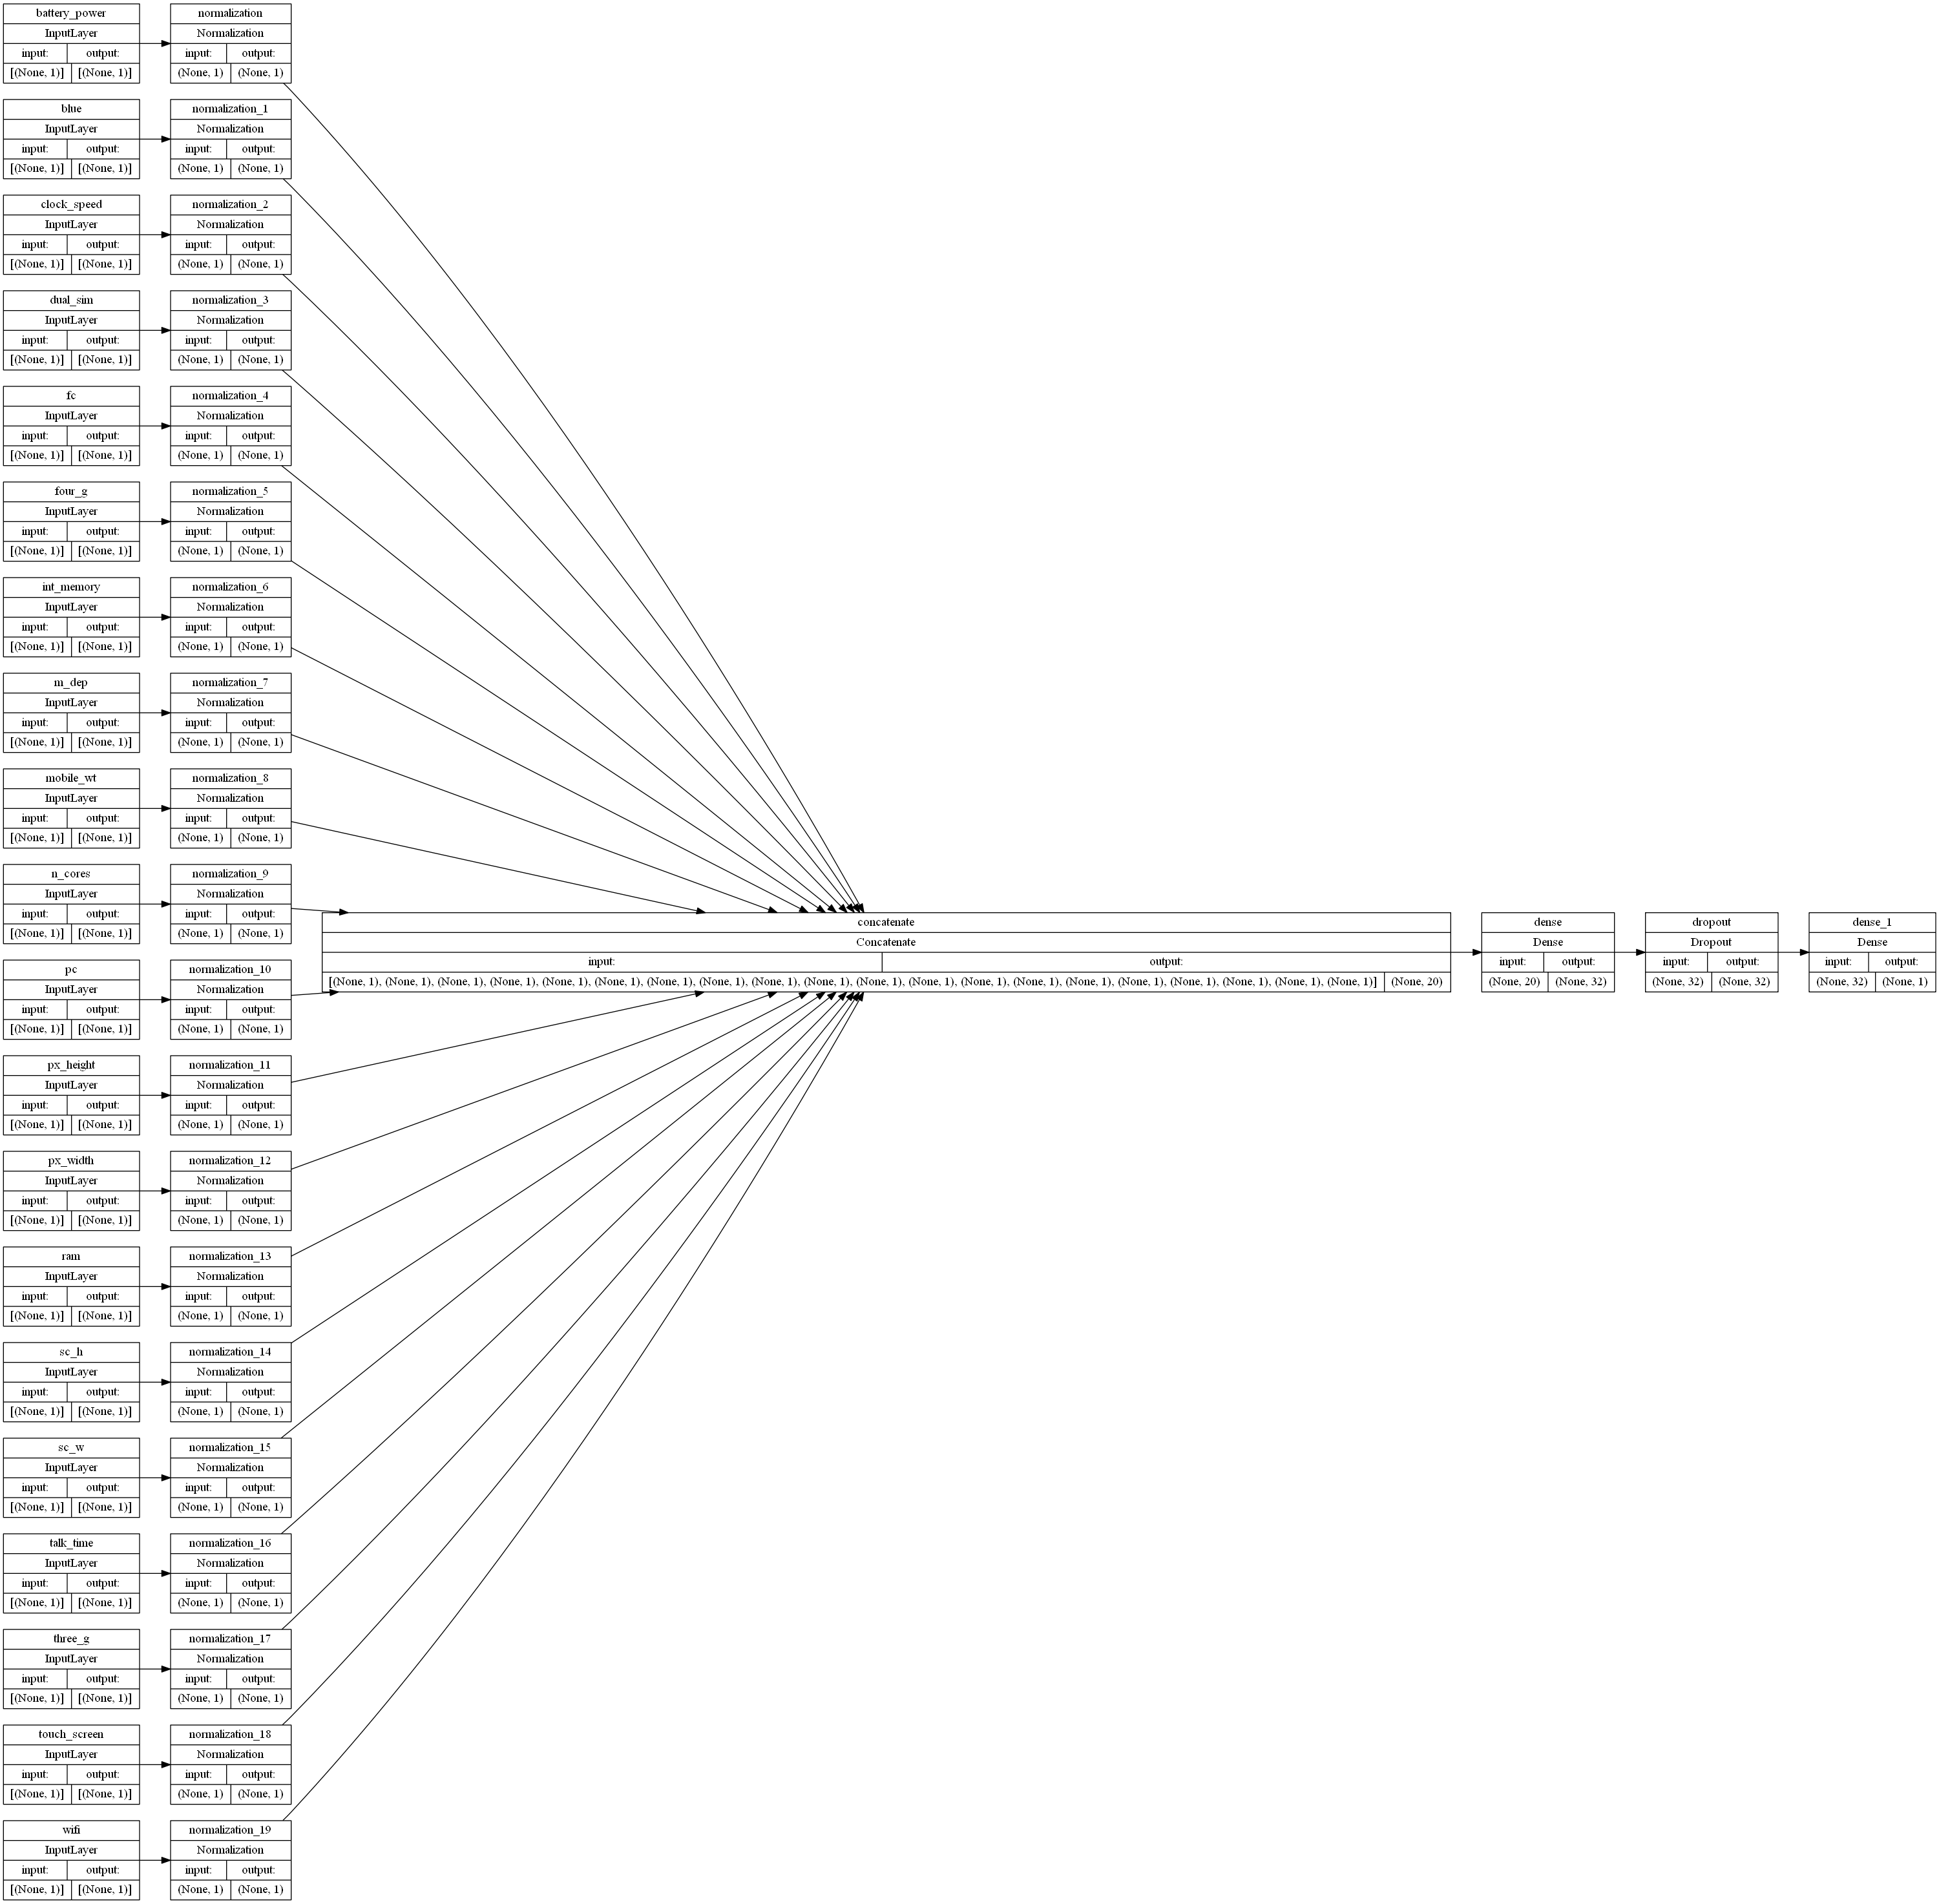

In [33]:
# `rankdir='LR'` is to make the graph horizontal.
tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

Training

In [34]:
loss, accuracy = model.evaluate(ds_val)

print("Accuracy", round(accuracy, 2))

13/13 [==============================] - 2s 5ms/step - loss: 0.1696 - accuracy: 0.2425
Accuracy 0.24


In [35]:
model.save('my_hd_classifier_mobile_classi')

INFO:tensorflow:Assets written to: my_hd_classifier_mobile_classi\assets


In [36]:
reloaded_model = tf.keras.models.load_model('my_hd_classifier_mobile_classi')

In [37]:
sample = {
'battery_power': 2000,
'px_height': 1,  
'wifi': 1,
'touch_screen': 1,    
'three_g': 1,
'talk_time': 10,
'sc_w': 8,
'sc_h': 12,
'ram': 3873,
'px_width': 957,
'pc': 20,
'blue': 1,
'n_cores': 5, 
'mobile_wt': 156,
'm_dep': 0.8,
'int_memory':50, 
'four_g': 1,
'fc': 14,
'dual_sim': 1,
'clock_speed': 0.5,
'price_range': "fixed",
}

In [38]:
input_dict = {name: tf.convert_to_tensor([value]) for name, value in sample.items()}

In [39]:
predictions = reloaded_model.predict(input_dict)

c:\Users\Jerma\anaconda3\envs\tf\lib\site-packages\keras\engine\functional.py:559: UserWarning: Input dict contained keys ['price_range'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


In [40]:
print(
    "Mit diesen ausgewählten Parametern besteht die Auswahl für ein gutes Smartphone bei %.1f prozentigen Wahrscheinlichkeit "
     % (100 * predictions[0][0],)
)

Mit diesen ausgewählten Parametern besteht die Auswahl für ein gutes Smartphone bei  71.5 prozentigen Wahrscheinlichkeit 
